In [1]:
import pandas as pd
df = pd.read_csv("house_prices.csv")

# Displaying the first 5 rows of the DataFrame
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,NaN,1340,0,2008,0
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,NaN,3540,0,2007,0
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,NaN,6420,850,2010,0
3,324000.0,3.0,2.25,998,904,2.0,0,0,NaN,798,200,2007,0
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5.0,1600,1460,1979,0


In [2]:
# Displaying column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      3595 non-null   float64
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  yr_built       4140 non-null   int64  
 12  yr_renovated   4140 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 420.6 KB


In [3]:
# Summary statistics of numerical columns
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,3595.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.521001,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.703193,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [4]:
# Data types of df
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition        float64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

In [5]:
# How many missing values are in data set
df.isnull().sum()

# Calculate the median of the 'condition' field and fill missing values in “condition” with it
df['condition'] = df['condition'].fillna(df['condition'].median())
    
# Display the DataFrame head
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3.0,1340,0,2008,0
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3.0,3540,0,2007,0
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3.0,6420,850,2010,0
3,324000.0,3.0,2.25,998,904,2.0,0,0,3.0,798,200,2007,0
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5.0,1600,1460,1979,0


In [6]:
# Select relevant features and target variable

X = df[['sqft_living', 'bedrooms', 'floors', 'condition', 'yr_built', 'yr_renovated', 'view', 'bathrooms']]
y = df['price']

# Check shape of features and target
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (4140, 8)
Shape of y: (4140,)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shape of splits
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (3312, 8)
Shape of X_test: (828, 8)


In [8]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Your Mean Squared Error (MSE): {mse}")
print(f"Your R-squared: {r_squared}")
print(f"Your Mean Absolute Error (MAE): {mae}")

Your Mean Squared Error (MSE): 63930984737.73497
Your R-squared: 0.3901777714316532
Your Mean Absolute Error (MAE): 166004.32949282712


In [10]:
# Check residual stats -- y test values minus y predicted values
residuals = y_test - y_pred

print(f'Residual mean: {residuals.mean()}')
print(f'Residual std deviation: {residuals.std()}')

Residual mean: -13707.033130641312
Residual std deviation: 252626.56133501514


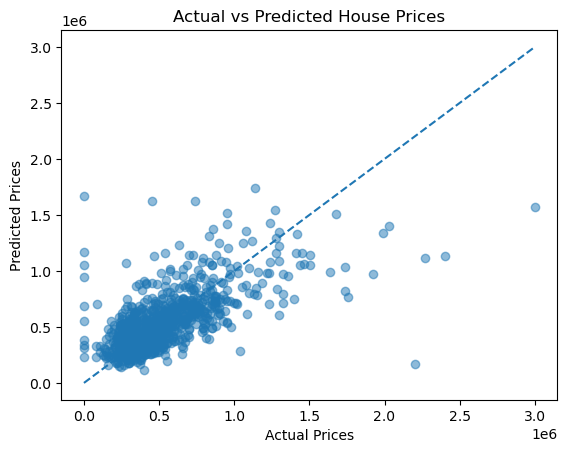

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

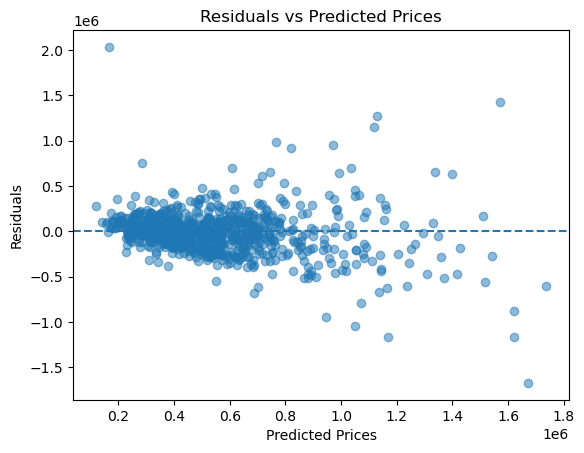

In [12]:
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')

plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()

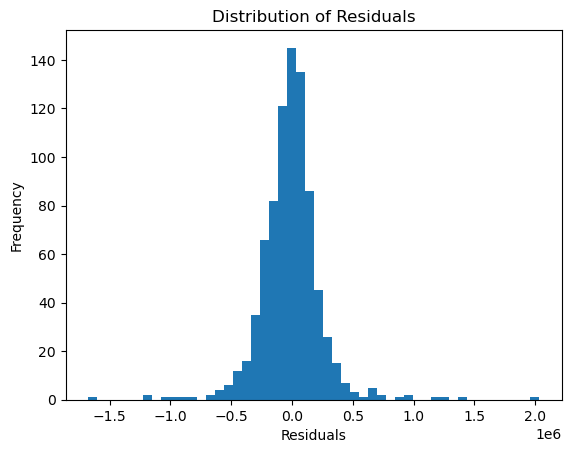

In [13]:
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [14]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
7,bathrooms,57359.603072
6,view,50114.792178
2,floors,35743.667508
3,condition,25038.580296
0,sqft_living,272.068191
5,yr_renovated,4.998018
4,yr_built,-2167.322288
1,bedrooms,-68801.685501


In [15]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)

print(f"DecisionTreeRegressor MSE: {tree_mse}")
print(f"DecisionTreeRegressor R-squared: {tree_r2}")
print(f"DecisionTreeRegressor MAE: {tree_mae}")

DecisionTreeRegressor MSE: 311245189533.956
DecisionTreeRegressor R-squared: -1.968892719100312
DecisionTreeRegressor MAE: 241096.3715191099


In [16]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)

print(f"RandomForestRegressor MSE: {forest_mse}")
print(f"RandomForestRegressor R-squared: {forest_r2}")
print(f"RandomForestRegressor MAE: {forest_mae}")

RandomForestRegressor MSE: 77871559763.0307
RandomForestRegressor R-squared: 0.2572019919356079
RandomForestRegressor MAE: 174132.46836253576
